In [31]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')
sys.path.append('C://Users//DavidB//PycharmProjects//My_Football_Analytics//Position_data')

import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softplus
import Data.Metrica_IO as mio
from Tracking_Data import tracking_data
import pitch_control as pc

## set GPU or CPU (uncomment second line to use CPU)
# device = torch.device('cuda:0'); dtype = torch.float16
device = 'cpu'; dtype = torch.float32

In [32]:
# supposed to be based on td_object --> first create one
# everywhere we call the object now will later be self

data_dir = 'sample-data-master/data/'
game_id = 1
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='myPitch')
td_object.get_velocities()

td_object

Reading team: away
Reading team: home


In [33]:
pc, S, h, wi = pc.tensor_pitch_control(td_object)

Current batch: 1/2
Current batch: 2/2


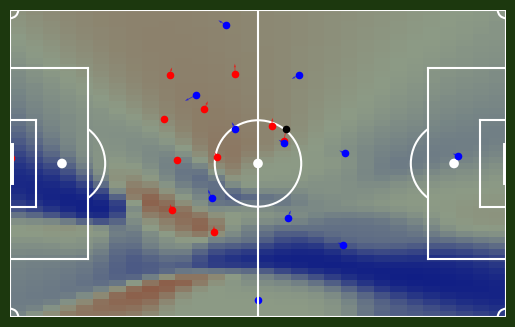

In [47]:
cmap = 'bwr'

fig, ax = td_object.plot_players(frame=5, velocities=True)
ax.imshow(np.flipud(pc[200]), extent=(
    min(td_object.x_range_pitch), max(td_object.x_range_pitch), min(td_object.y_range_pitch),
    max(td_object.y_range_pitch)), cmap=cmap, alpha=0.5, vmin=0.0, vmax=1.0)


In [36]:
pc.min()

tensor(0.)